In [1]:
# libraries for data manipultion
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt

# libraries for machine learning
from sklearn.linear_model import LinearRegression

# libraries for statistics
import statsmodels.api as sm

In [58]:
#preprocess eikon data
tr_eikon_df = pd.read_csv('tr_eikon_eod_data.csv')
tr_eikon_df.index = pd.to_datetime(tr_eikon_df['Date'])
tr = tr_eikon_df[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna()

#create a separate dataframe so that the column names can be accessed conveniently in loop
store = tr.copy(deep = True)

#covert returns to log returns
for col in tr.columns:
    tr['Returns' + ' ' + col] = np.log(tr[col] / tr[col].shift(1))

tr = tr.dropna()
tr

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N
Date,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.008861,-0.012802,0.005744,-0.024350,-0.015902
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338


Website for fama french data: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

Data collected under fama french 3 factors [daily]

Original data was manually edited as there was parsing issues

In [59]:
#read and parse the fama data collected from the website
fama3 = pd.read_csv('fama3.csv')
fama3['Date'] = fama3['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
fama3.index = pd.to_datetime(fama3['Date'])
fama3 = fama3.drop(columns = ['RF'])
fama3

,Date,Mkt-RF,SMB,HML
Date,,,,
1926-07-01,1926-07-01,0.10,-0.25,-0.27
1926-07-02,1926-07-02,0.45,-0.33,-0.06
1926-07-06,1926-07-06,0.17,0.30,-0.39
1926-07-07,1926-07-07,0.09,-0.58,0.02
1926-07-08,1926-07-08,0.21,-0.38,0.19
...,...,...,...,...
2024-01-25,2024-01-25,0.46,0.04,0.56
2024-01-26,2024-01-26,-0.02,0.40,-0.27
2024-01-29,2024-01-29,0.85,1.07,-0.59


In [60]:
data = pd.merge(tr, fama3, left_index=True, right_index=True)
data = data.drop(columns = ['Date'])
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML
Date,,,,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525,0.31,-0.64,1.24
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.13,-0.22,0.57
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.40,0.09,0.98
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093,0.33,0.37,0.01
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.008861,-0.012802,0.005744,-0.024350,-0.015902,0.13,-0.13,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-1.48,-0.54,0.57
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181,0.27,0.63,-0.24
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-1.02,-1.00,0.36


In [61]:
#train test split 80/20
preddat = data.copy(deep = True)
split = int(0.8 * len(preddat))
data_train = preddat[: split]
data_test = preddat[split:]

Strategy: Enter into a position when Predicted returns > Actual returns. Exit a position when Predicted returns > Actual returns

In [62]:
#generate signals to buy stock when predicted returns are lesser or higher than actual returns
def buysignals3(greater):
    model = LinearRegression()
    signals3 = data_test.copy(deep = True) 
    for col in store.columns:
        pred_returns = model.fit(data_train[['Mkt-RF','SMB','HML']], data_train['Returns' + ' ' + col]).predict(signals3[['Mkt-RF','SMB','HML']])
        signals3['pred_returns ' + col] = pred_returns
        if greater == True:
            signals3['Buy Signal ' + col] = np.where((signals3['pred_returns ' + col] > signals3['Returns' + ' ' + col]),1,-1)
        else:
            signals3['Buy Signal ' + col] = np.where((signals3['pred_returns ' + col] < signals3['Returns' + ' ' + col]),1,-1)
    return signals3

In [64]:
#get relevant data for backtesting
def get_backtest_data(data1, data2, sym):
    store = data1[['Returns ' + sym, 'pred_returns ' + sym, 'Buy Signal ' + sym]].join(data2[[sym]], how = 'inner')
    return store.copy(deep = True)

#function to backtest on all stocks, generate results, and plot returns graph
def backtest(signals, what):
    for col in store.columns:
        temp = get_backtest_data(signals, tr, col)
        temp['Strat Returns ' + col] = temp['Buy Signal ' + col].shift(1) * temp['Returns ' + col]
        if what == 'returns':
            print(temp[['Returns ' + col, 'Strat Returns ' + col]].sum().apply(np.exp))
            print('\n')
        if what == 'volatility':
            print(temp[['Returns ' + col, 'Strat Returns ' + col]].std())
            print('\n')
        if what == 'plot':
            temp[['Returns ' + col, 'Strat Returns ' + col]].cumsum().apply(np.exp).plot()



Backtest results for returns
Returns AAPL.O          1.574734
Strat Returns AAPL.O    0.743315
dtype: float64


Returns MSFT.O          1.723348
Strat Returns MSFT.O    1.488425
dtype: float64


Returns INTC.O          1.333065
Strat Returns INTC.O    1.261794
dtype: float64


Returns AMZN.O          2.090903
Strat Returns AMZN.O    1.085851
dtype: float64


Returns GS.N          1.305148
Strat Returns GS.N    1.168354
dtype: float64


Volatility results
Returns AAPL.O          0.012349
Strat Returns AAPL.O    0.012390
dtype: float64


Returns MSFT.O          0.012188
Strat Returns MSFT.O    0.012228
dtype: float64


Returns INTC.O          0.015224
Strat Returns INTC.O    0.015236
dtype: float64


Returns AMZN.O          0.015044
Strat Returns AMZN.O    0.015156
dtype: float64


Returns GS.N          0.013873
Strat Returns GS.N    0.013860
dtype: float64




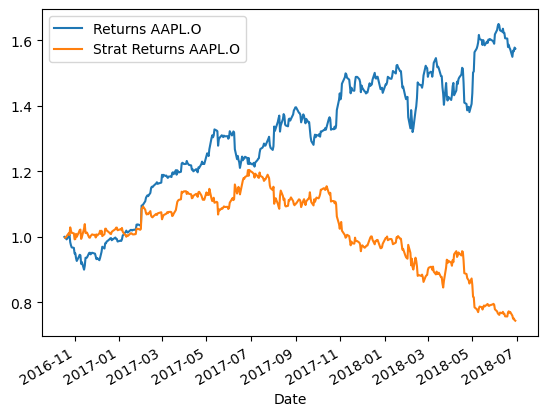

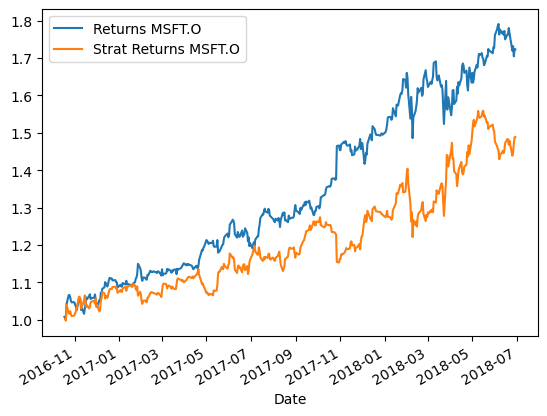

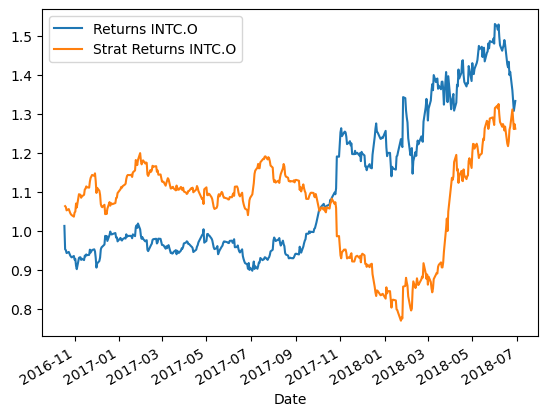

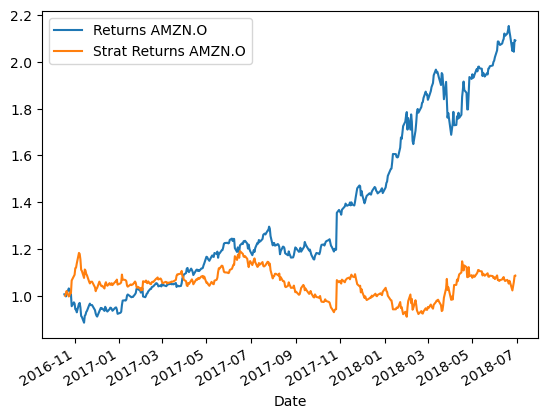

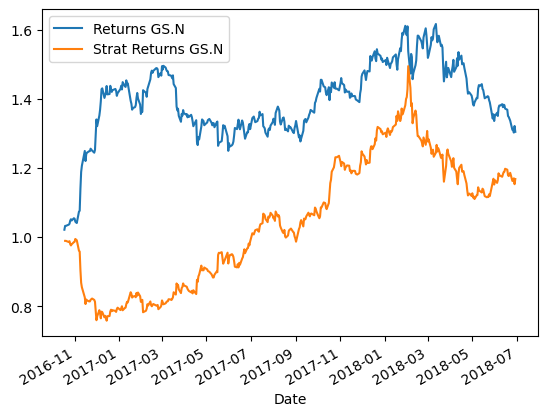

In [65]:
#backtest strategy and generate results
signaldata = buysignals3(True)

print('Backtest results for returns')
backtest(signaldata, 'returns')
print('Volatility results')
backtest(signaldata, 'volatility')
backtest(signaldata, 'plot')

Backtest results for returns
Returns AAPL.O          1.574734
Strat Returns AAPL.O    1.345325
dtype: float64


Returns MSFT.O          1.723348
Strat Returns MSFT.O    0.671851
dtype: float64


Returns INTC.O          1.333065
Strat Returns INTC.O    0.792522
dtype: float64


Returns AMZN.O          2.090903
Strat Returns AMZN.O    0.920937
dtype: float64


Returns GS.N          1.305148
Strat Returns GS.N    0.855905
dtype: float64


Volatility results
Returns AAPL.O          0.012349
Strat Returns AAPL.O    0.012390
dtype: float64


Returns MSFT.O          0.012188
Strat Returns MSFT.O    0.012228
dtype: float64


Returns INTC.O          0.015224
Strat Returns INTC.O    0.015236
dtype: float64


Returns AMZN.O          0.015044
Strat Returns AMZN.O    0.015156
dtype: float64


Returns GS.N          0.013873
Strat Returns GS.N    0.013860
dtype: float64




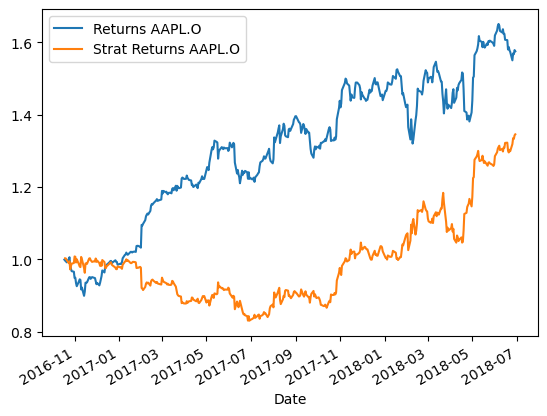

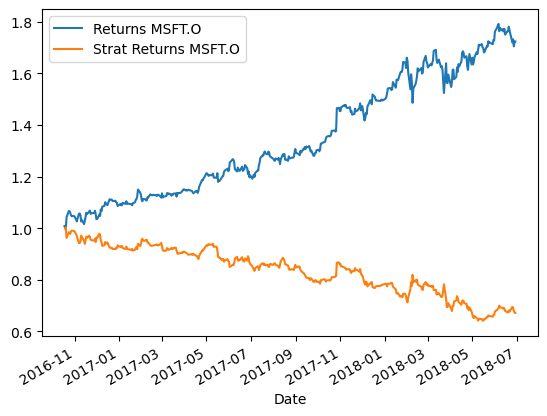

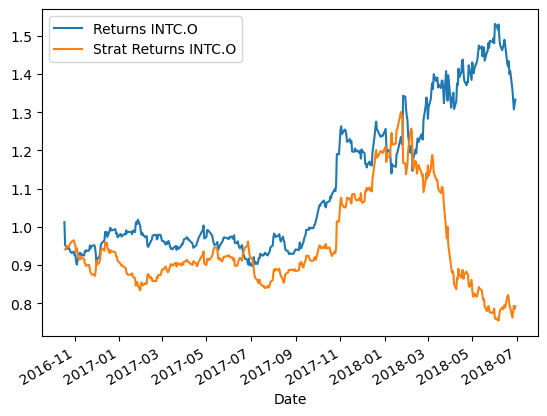

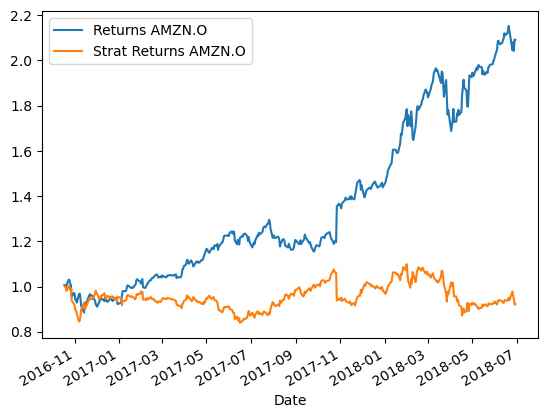

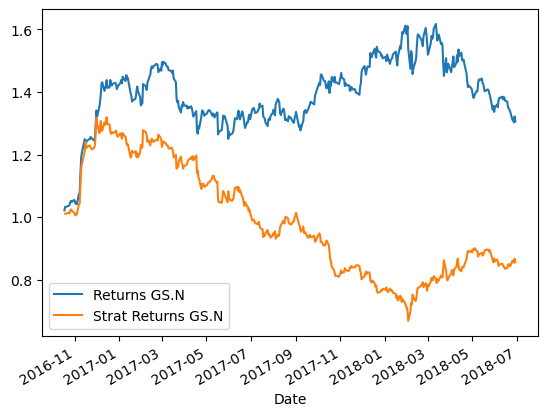

In [66]:
#backtest strategy and generate results
signaldata = buysignals3(False)

print('Backtest results for returns')
backtest(signaldata, 'returns')
print('Volatility results')
backtest(signaldata, 'volatility')
backtest(signaldata, 'plot')

In [67]:
#Statistical summary of regression of testing data
X = sm.add_constant(data_test[["Mkt-RF", "SMB", "HML"]])

for col in store.columns:
    y = data_test['Returns' + ' ' + col]
    model = sm.OLS(y, X).fit()
    print('Model summary for ' + col + '\n')
    print(model.summary())
    print('\n')

Model summary for AAPL.O

                            OLS Regression Results                            
Dep. Variable:         Returns AAPL.O   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     105.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           6.04e-51
Time:                        19:42:41   Log-Likelihood:                 1393.0
No. Observations:                 428   AIC:                            -2778.
Df Residuals:                     424   BIC:                            -2762.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003     

In [69]:
#like before, orginal 5 factor data was manually edited as there were parsing issues

fama5 = pd.read_csv('fama5.csv')
fama5['Date'] = fama5['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
fama5.index = pd.to_datetime(fama5['Date'])
fama5 = fama5.drop(columns = ['RF'])
fama5

,Date,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
1963-07-01,1963-07-01,-0.67,0.02,-0.35,0.03,0.13
1963-07-02,1963-07-02,0.79,-0.28,0.28,-0.08,-0.21
1963-07-03,1963-07-03,0.63,-0.18,-0.10,0.13,-0.25
1963-07-05,1963-07-05,0.40,0.09,-0.28,0.07,-0.30
1963-07-08,1963-07-08,-0.63,0.07,-0.20,-0.27,0.06
...,...,...,...,...,...,...
2024-02-23,2024-02-23,0.02,0.32,-0.03,0.09,-0.11
2024-02-26,2024-02-26,-0.26,0.97,-0.11,-0.74,-0.01
2024-02-27,2024-02-27,0.27,1.24,-0.45,-1.14,0.67


In [70]:
#merge data so that the corresponding fama data aligns with the date in eikon data
data5 = pd.merge(tr, fama5, left_index=True, right_index=True)
data5 = data5.drop(columns = ['Date'])
data5

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns AAPL.O,Returns MSFT.O,Returns INTC.O,Returns AMZN.O,Returns GS.N,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,,,,,,,,,,
2010-01-05,30.625684,30.960,20.87,134.690,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525,0.31,-0.41,1.24,-0.19,0.19
2010-01-06,30.138541,30.770,20.80,132.250,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.13,-0.13,0.57,-0.05,0.20
2010-01-07,30.082827,30.452,20.60,130.000,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.40,0.25,0.98,-0.69,0.22
2010-01-08,30.282827,30.660,20.83,133.520,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093,0.33,0.32,0.01,0.22,-0.37
2010-01-11,30.015684,30.270,20.95,130.308,171.56,-0.008861,-0.012802,0.005744,-0.024350,-0.015902,0.13,-0.13,-0.25,0.19,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.150,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-1.48,-0.45,0.57,0.63,-0.02
2018-06-26,184.430000,99.080,49.67,1691.090,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181,0.27,0.51,-0.24,-0.48,0.13
2018-06-27,184.160000,97.540,48.76,1660.510,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-1.02,-1.01,0.36,-0.06,0.47


In [54]:
#train test split 80/20
preddat5 = data5.copy(deep = True)
split = int(0.8 * len(preddat5))
data_train5 = preddat5[: split]
data_test5 = preddat5[split:]

In [55]:
#generate signals for 5 factor model
def buysignals5(greater):
    signals5 = data_test5.copy(deep = True)
    model = LinearRegression()
    for col in store.columns:
        pred_returns = model.fit(data_train5[['Mkt-RF','SMB','HML', 'RMW', 'CMA']], data_train5['Returns' + ' ' + col]).predict(signals5[['Mkt-RF','SMB','HML', 'RMW', 'CMA']])
        signals5['pred_returns ' + col] = pred_returns
        if greater == True:
            signals5['Buy Signal ' + col] = np.where((signals5['pred_returns ' + col] > signals5['Returns' + ' ' + col]),1,-1)
        else:
            signals5['Buy Signal ' + col] = np.where((signals5['pred_returns ' + col] < signals5['Returns' + ' ' + col]),1,-1)
    return signals5

Backtest results for returns
Returns AAPL.O          1.574734
Strat Returns AAPL.O    0.851148
dtype: float64


Returns MSFT.O          1.723348
Strat Returns MSFT.O    1.469435
dtype: float64


Returns INTC.O          1.333065
Strat Returns INTC.O    1.298651
dtype: float64


Returns AMZN.O          2.090903
Strat Returns AMZN.O    0.966389
dtype: float64


Returns GS.N          1.305148
Strat Returns GS.N    0.782157
dtype: float64


Volatility results
Returns AAPL.O          0.012349
Strat Returns AAPL.O    0.012404
dtype: float64


Returns MSFT.O          0.012188
Strat Returns MSFT.O    0.012230
dtype: float64


Returns INTC.O          0.015224
Strat Returns INTC.O    0.015233
dtype: float64


Returns AMZN.O          0.015044
Strat Returns AMZN.O    0.015157
dtype: float64


Returns GS.N          0.013873
Strat Returns GS.N    0.013853
dtype: float64




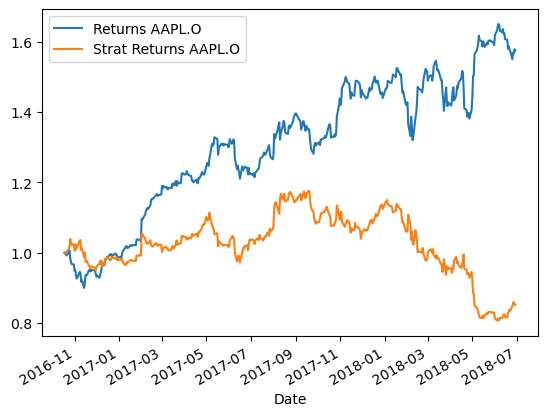

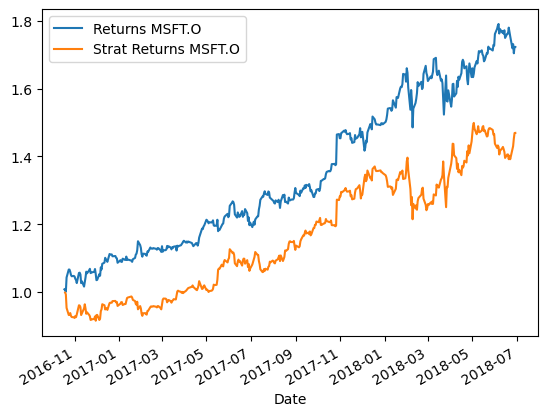

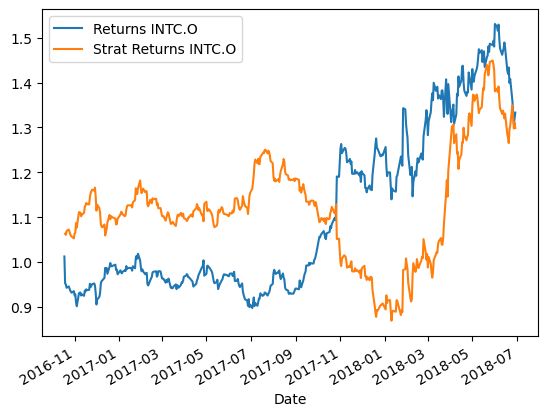

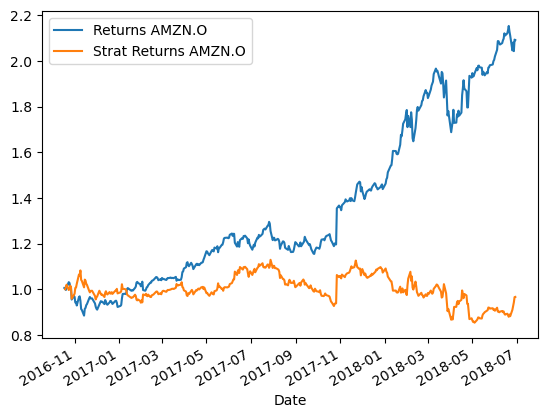

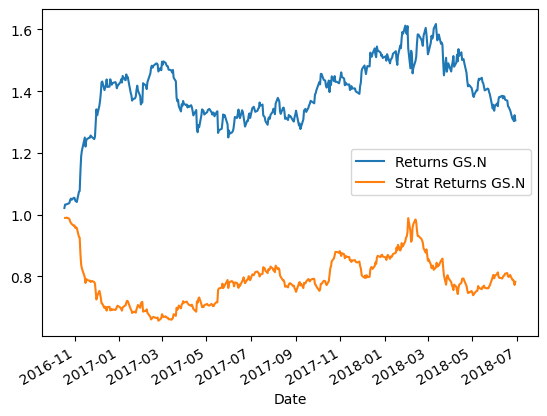

In [56]:
signaldata = buysignals5(True)

print('Backtest results for returns')
backtest(signaldata, 'returns')
print('Volatility results')
backtest(signaldata, 'volatility')
backtest(signaldata, 'plot')

Backtest results for returns
Returns AAPL.O          1.574734
Strat Returns AAPL.O    0.851148
dtype: float64


Returns MSFT.O          1.723348
Strat Returns MSFT.O    1.469435
dtype: float64


Returns INTC.O          1.333065
Strat Returns INTC.O    1.298651
dtype: float64


Returns AMZN.O          2.090903
Strat Returns AMZN.O    0.966389
dtype: float64


Returns GS.N          1.305148
Strat Returns GS.N    0.782157
dtype: float64


Volatility results
Returns AAPL.O          0.012349
Strat Returns AAPL.O    0.012404
dtype: float64


Returns MSFT.O          0.012188
Strat Returns MSFT.O    0.012230
dtype: float64


Returns INTC.O          0.015224
Strat Returns INTC.O    0.015233
dtype: float64


Returns AMZN.O          0.015044
Strat Returns AMZN.O    0.015157
dtype: float64


Returns GS.N          0.013873
Strat Returns GS.N    0.013853
dtype: float64




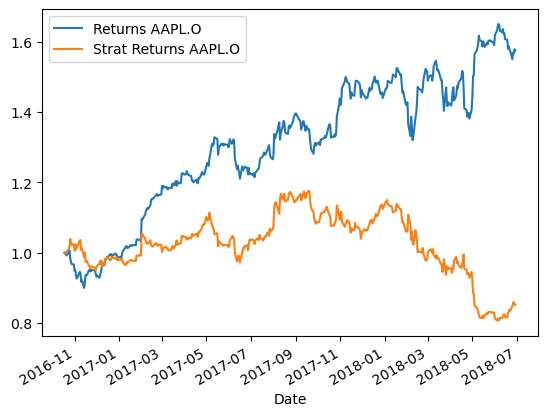

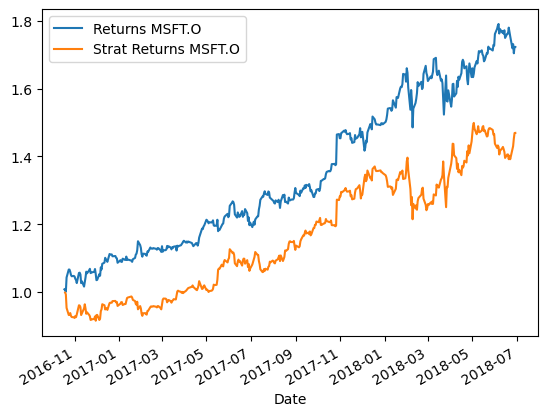

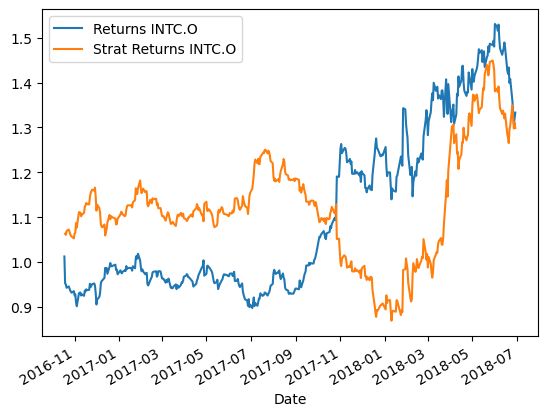

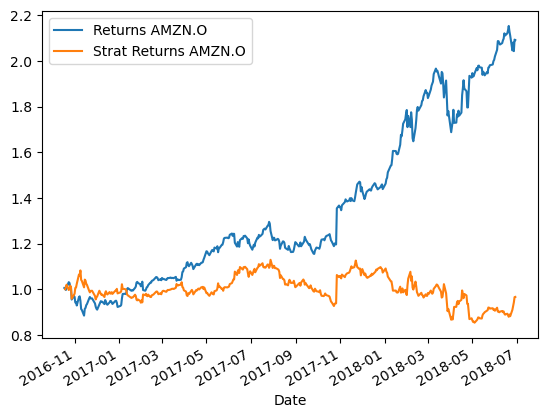

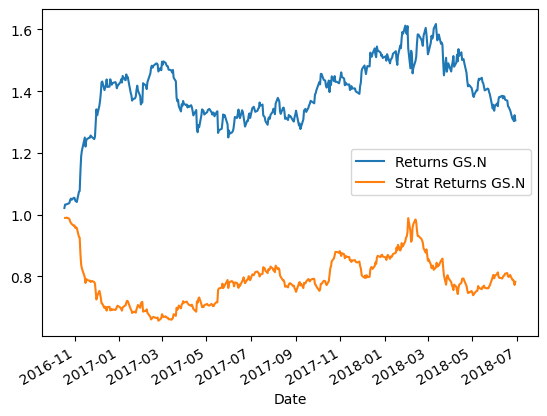

In [42]:
signaldata = buysignals5(True)

print('Backtest results for returns')
backtest(signaldata, 'returns')
print('Volatility results')
backtest(signaldata, 'volatility')
backtest(signaldata, 'plot')

In [57]:
#generate statistical summary for 5 factor model
X2 = sm.add_constant(data_test5[['Mkt-RF','SMB','HML', 'RMW', 'CMA']])

for col in store.columns:
    y2 = data_test5['Returns' + ' ' + col]
    model = sm.OLS(y2, X2).fit()
    print('Model summary for ' + col + '\n')
    print(model.summary())
    print('\n')

Model summary for AAPL.O

                            OLS Regression Results                            
Dep. Variable:         Returns AAPL.O   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     66.49
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           3.95e-51
Time:                        19:39:03   Log-Likelihood:                 1398.2
No. Observations:                 428   AIC:                            -2784.
Df Residuals:                     422   BIC:                            -2760.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002     